In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
import shap
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [2]:
# ===============================================================
# 1) LOAD DATASETS
# ===============================================================

from pathlib import Path
OUT = Path.home() / "ml_outputs"
print(OUT)
data = pd.read_csv(OUT / 'Cleaned_Features_for_ML.csv', index_col=0, parse_dates=True)

C:\Users\dax_a\ml_outputs


In [4]:
# ===============================================================
# EXPLORATORY DATA ANALYSIS (EDA) – BINARY CLASSIFICATION
# ===============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# ---------------------------------------------------------------
# 1) BASIC INSPECTION
# ---------------------------------------------------------------
print("Shape of dataset:", data.shape)
print("\n--- Data types ---")
print(data.dtypes)

print("\n--- Missing values ---")
print(data.isnull().sum())

print("\n--- First 5 rows ---")
display(data.head())

Shape of dataset: (3970, 45)

--- Data types ---
S&P500                               float64
NASDAQ                               float64
DowJones                             float64
CAC40                                float64
DAX                                  float64
FTSE100                              float64
Nikkei225                            float64
HangSeng                             float64
MSCIWorld                            float64
US10Y                                float64
US2Y                                 float64
TLT                                  float64
IEF                                  float64
BND                                  float64
LQD                                  float64
Apple                                float64
Microsoft                            float64
Google                               float64
Amazon                               float64
Meta                                 float64
Inflation_CPI                        float64
Unempl

,S&P500,NASDAQ,DowJones,CAC40,DAX,FTSE100,Nikkei225,HangSeng,MSCIWorld,US10Y,...,OECD_CPI_2015idx_USA,OECD_Unemp_rate_pct_USA,target_index,Volatility_20d,MA20,MA50,Momentum,RSI,Direction,Return
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-29,-0.004159,-0.005683,-0.002926,-0.005027,-0.007160,-0.001072,-0.005870,0.000125,0.0,-0.000666,...,91.644471,9.4,-0.010922,0.015059,0.002010,0.001790,-1.580904,46.094429,0,-0.010922
2010-07-30,0.000063,0.001337,-0.000117,-0.002401,0.002163,-0.010538,-0.016370,-0.003035,0.0,-0.030677,...,91.644471,9.4,-0.003332,0.014990,0.002153,0.001340,-1.937987,51.353867,1,-0.003332
2010-08-02,0.022023,0.018034,0.019916,0.029889,0.023448,0.026455,0.003461,0.018211,0.0,0.019264,...,91.815778,9.4,0.017881,0.015370,0.002705,0.001331,-8.041734,59.026358,1,0.017881
2010-08-03,-0.004796,-0.005158,-0.003560,-0.001205,0.002508,-0.000111,0.012925,0.002096,0.0,-0.016537,...,91.815778,9.4,0.000306,0.015368,0.002720,0.001462,-0.983496,49.192531,1,0.000306
2010-08-04,0.006051,0.008780,0.004141,0.003525,0.003713,-0.001909,-0.021113,0.004298,0.0,0.013040,...,91.815778,9.4,0.004009,0.012575,0.000901,0.001633,-1.339337,52.216035,0,0.004009



--- Descriptive statistics (numeric features) ---


,count,mean,std,min,25%,50%,75%,max
S&P500,3970.0,5.167471e-04,1.068764e-02,-1.198406e-01,-3.522569e-03,3.815231e-04,5.406720e-03,9.515388e-02
NASDAQ,3970.0,6.737833e-04,1.269217e-02,-1.232133e-01,-4.482265e-03,7.922541e-04,6.978650e-03,1.216316e-01
DowJones,3970.0,4.324283e-04,1.027545e-02,-1.292655e-01,-3.545837e-03,3.707589e-04,5.057467e-03,1.136504e-01
CAC40,3970.0,2.699785e-04,1.199932e-02,-1.227677e-01,-5.354402e-03,3.812705e-04,6.324957e-03,8.389477e-02
DAX,3970.0,4.108858e-04,1.207469e-02,-1.223861e-01,-4.889512e-03,5.283020e-04,6.440076e-03,1.097590e-01
FTSE100,3970.0,1.970916e-04,9.545416e-03,-1.087382e-01,-4.206367e-03,2.657419e-04,4.911738e-03,9.053047e-02
Nikkei225,3970.0,5.033628e-04,1.295437e-02,-1.239576e-01,-5.629966e-03,4.103525e-05,7.081992e-03,1.022633e-01
HangSeng,3970.0,1.371390e-04,1.286251e-02,-1.322335e-01,-6.350046e-03,0.000000e+00,6.617001e-03,9.081796e-02
MSCIWorld,3970.0,4.451436e-04,1.008709e-02,-1.137763e-01,-2.960531e-03,0.000000e+00,4.402041e-03,9.096311e-02
US10Y,3970.0,4.621020e-04,2.793800e-02,-2.932011e-01,-1.249195e-02,0.000000e+00,1.256891e-02,4.989980e-01



--- Target variable distribution ---
Direction
1    0.513098
0    0.486902
Name: proportion, dtype: float64


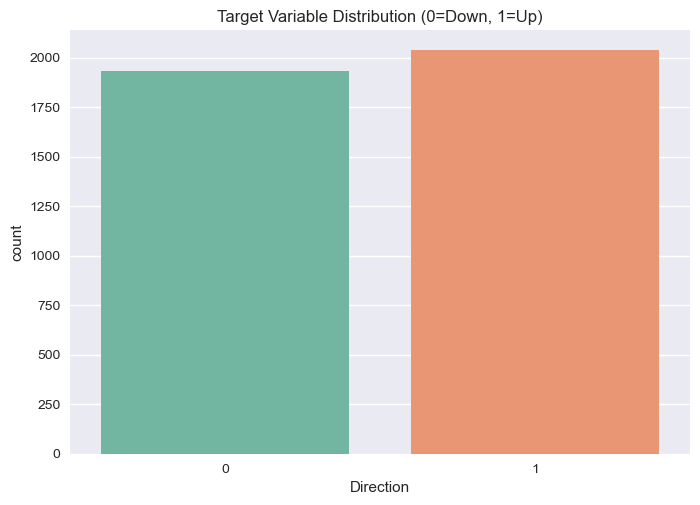

In [3]:
# ---------------------------------------------------------------
# 2) DESCRIPTIVE STATISTICS
# ---------------------------------------------------------------
print("\n--- Descriptive statistics (numeric features) ---")
display(data.describe().T)

# Target variable balance
print("\n--- Target variable distribution ---")
print(data["Direction"].value_counts(normalize=True))
sns.countplot(x="Direction", data=data, palette="Set2")
plt.title("Target Variable Distribution (0=Down, 1=Up)")
plt.show()

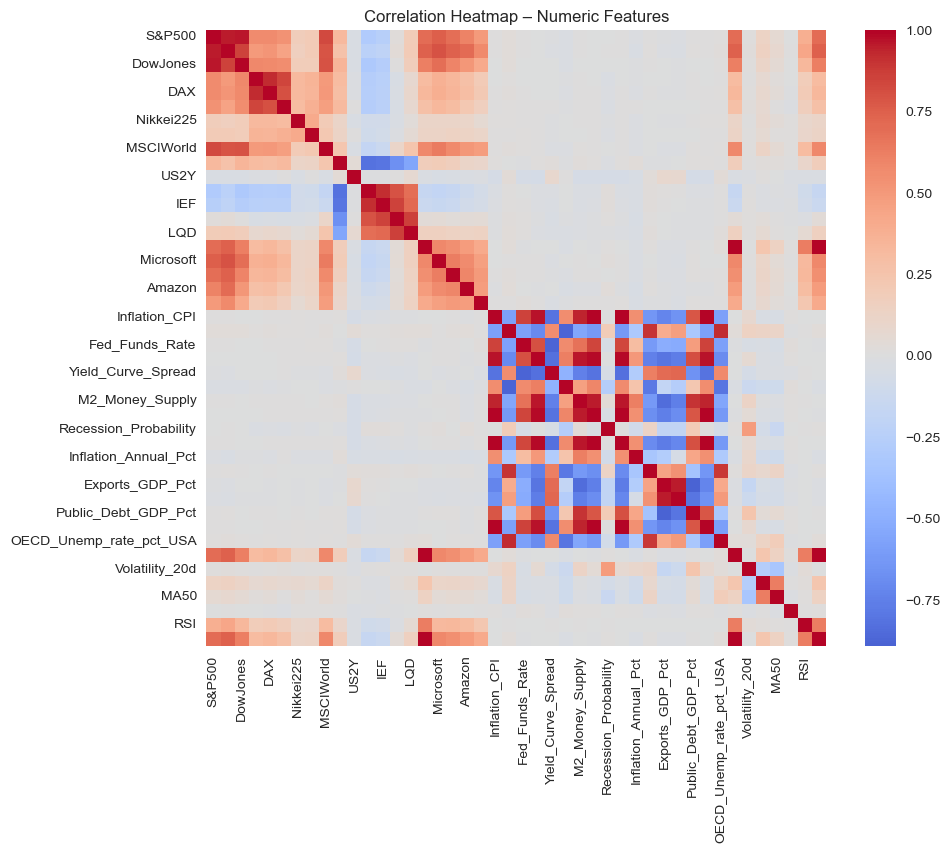


--- Correlation of each feature with Direction ---


Direction                            1.000000
LQD                                  0.041743
HangSeng                             0.035410
IEF                                  0.030401
BND                                  0.027737
TLT                                  0.027388
Nikkei225                            0.025533
MA20                                 0.024979
US2Y                                 0.018558
Fed_Funds_Rate                       0.014228
OECD_Unemp_rate_pct_USA              0.013385
Unemployment_Rate                    0.012440
Personal_Consumption_Expenditures    0.008396
GDP_Current_USD                      0.008134
Real_GDP                             0.007763
Inflation_CPI                        0.007056
OECD_CPI_2015idx_USA                 0.006917
M2_Money_Supply                      0.005380
MA50                                 0.003911
Public_Debt_GDP_Pct                  0.003699
RSI                                  0.000827
Unemployment_Total_Pct            

In [10]:
# ---------------------------------------------------------------
# 3) CORRELATION ANALYSIS
# ---------------------------------------------------------------
numeric_features = data.drop(columns=["Direction"]).select_dtypes(include=[np.number])
corr = numeric_features.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap – Numeric Features")
plt.show()

# Correlation with target
corr_target = data.corr()["Direction"].sort_values(ascending=False)
print("\n--- Correlation of each feature with Direction ---")
display(corr_target)


Number of outliers (|z|>3): 1526


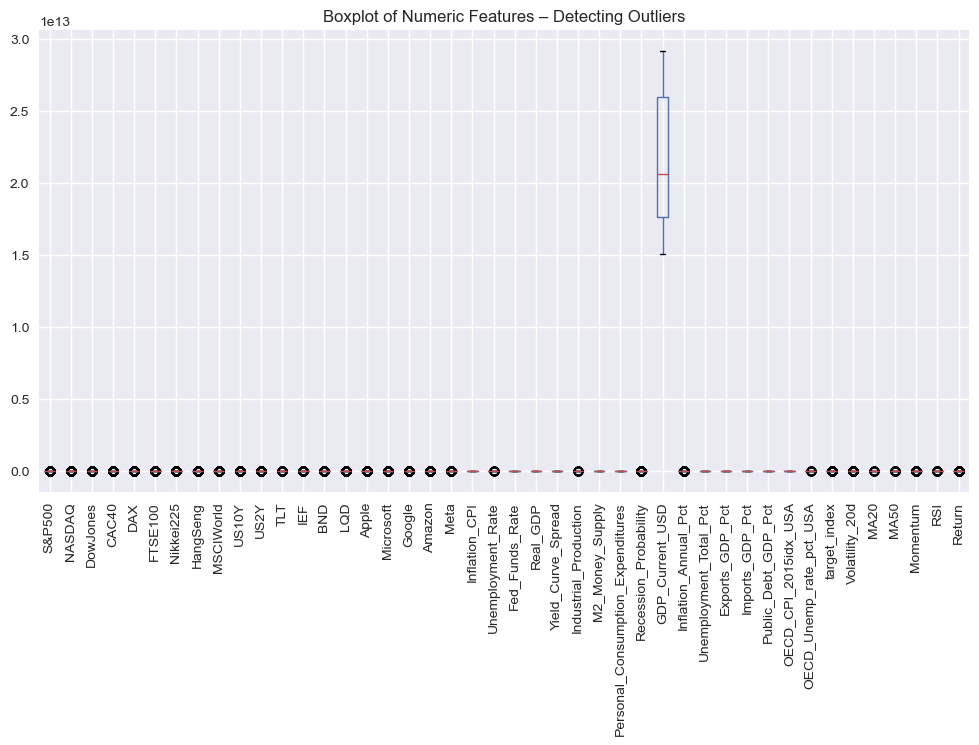

In [11]:
# ---------------------------------------------------------------
# 4) OUTLIER DETECTION
# ---------------------------------------------------------------
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Compute z-scores
z_scores = np.abs(stats.zscore(numeric_features.replace([np.inf, -np.inf], np.nan).fillna(0)))

# Identify outliers
outlier_rows = np.where(z_scores > 3)
print(f"\nNumber of outliers (|z|>3): {len(outlier_rows[0])}")

# Boxplots for visual detection
plt.figure(figsize=(12,6))
numeric_features.boxplot(rot=90)
plt.title("Boxplot of Numeric Features – Detecting Outliers")
plt.show()



--- Sensitivity (Point-biserial correlation with target) ---


,Correlation,p-value
LQD,0.037652,0.017670
HangSeng,0.034501,0.029721
BND,0.031769,0.045330
IEF,0.029422,0.063793
MA20,0.025995,0.101492
TLT,0.025573,0.107170
Nikkei225,0.017095,0.281537
Fed_Funds_Rate,0.014228,0.370117
OECD_Unemp_rate_pct_USA,0.012922,0.415649
Unemployment_Rate,0.012327,0.437470


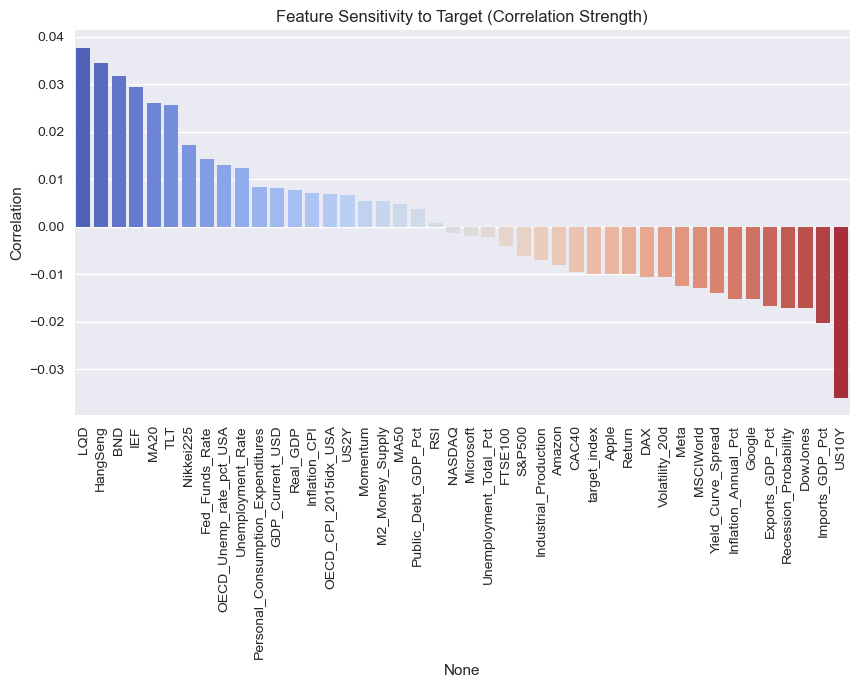

In [13]:
# ---------------------------------------------------------------
# 7) SENSITIVITY ANALYSIS (Feature vs Target)
# ---------------------------------------------------------------
# Point-biserial correlation (numerical vs binary target)
from scipy.stats import pointbiserialr

sensitivity = {}
for col in numeric_features.columns:
    corr_val, p_val = pointbiserialr(data_scaled[col], data_scaled["Direction"])
    sensitivity[col] = [corr_val, p_val]

sensitivity_df = pd.DataFrame(sensitivity, index=["Correlation", "p-value"]).T
sensitivity_df.sort_values("Correlation", ascending=False, inplace=True)

print("\n--- Sensitivity (Point-biserial correlation with target) ---")
display(sensitivity_df)

plt.figure(figsize=(10,5))
sns.barplot(x=sensitivity_df.index, y=sensitivity_df["Correlation"], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Feature Sensitivity to Target (Correlation Strength)")
plt.show()